# DATA 601 - HW06 (Spring 22)
Due date: May 12, 2022, 23:59 pm

In [3]:
# USUAL SUSPECTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

### Q1. (10 points)
Training and validation dataset: https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTraining.csv

* The last column of the HouseTraining.csv file lists price of 400 houses.
* There are 11 features
  * School rating (integer between 1 and 10)
  * House Area (sq ft)
  * Lot Area (sq ft)
  * Number of rooms
  * Number of bathrooms
  * Garage Yes:1, No: 0
  * Pool Yes:1, No: 0
  * Age of the House (years)
  * Walkability rating (something between 1 and 10)
  * Crime rate (something between 1 and 10)
  * Zipcode (Note that this is a fake data) 
  * House price ($)

Here are questions <br>
<b>1.1</b> Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate? <br>
<b>1.2</b> Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern? <br>
<b>1.3 </b> What feature has the strongest correlation with the "School_Rating" <br>
<b>1.4</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error using $100*\mathrm{max}|(y_i-\hat{y}_i)/y_i|$ and $R^2$, where $y_i$ is the true value for the $i^{th}$ case in your testing data set and $\hat{y}_i$ is the prediction. <br>
<b>1.5</b> Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv), guess the prices of these 10 houses featured in this dataset and print your predictions. Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

In [4]:
t_and_v = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTraining.csv')

In [5]:
t_and_v.drop(columns=['Unnamed: 0'], inplace=True)
t_and_v

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
0,8,3672,7364,5.0,5.0,1.0,0.0,8,8.0,4,20104,15332000.0
1,6,1743,3893,2.0,2.0,0.0,0.0,33,5.0,8,20140,6411000.0
2,8,2242,5199,3.0,3.0,1.0,0.0,34,7.0,6,20182,8931000.0
3,8,2257,4699,3.0,3.0,0.0,1.0,42,6.0,5,20182,8662000.0
4,8,2436,5200,3.0,3.0,1.0,0.0,70,7.0,6,20182,9098000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,8,1843,3654,3.0,2.0,1.0,0.0,53,5.0,6,20182,6627000.0
396,8,3031,6512,4.0,3.0,1.0,1.0,25,8.0,4,20104,12737000.0
397,6,2466,4202,4.0,4.0,1.0,1.0,14,4.0,7,20174,8524000.0
398,6,2559,5621,4.0,4.0,1.0,1.0,59,4.0,7,20174,10489000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


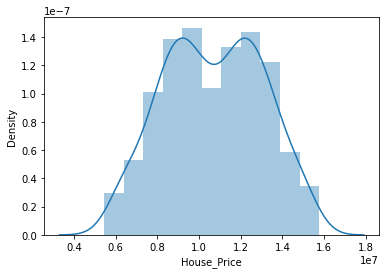

In [6]:
sns.distplot(t_and_v['House_Price']);

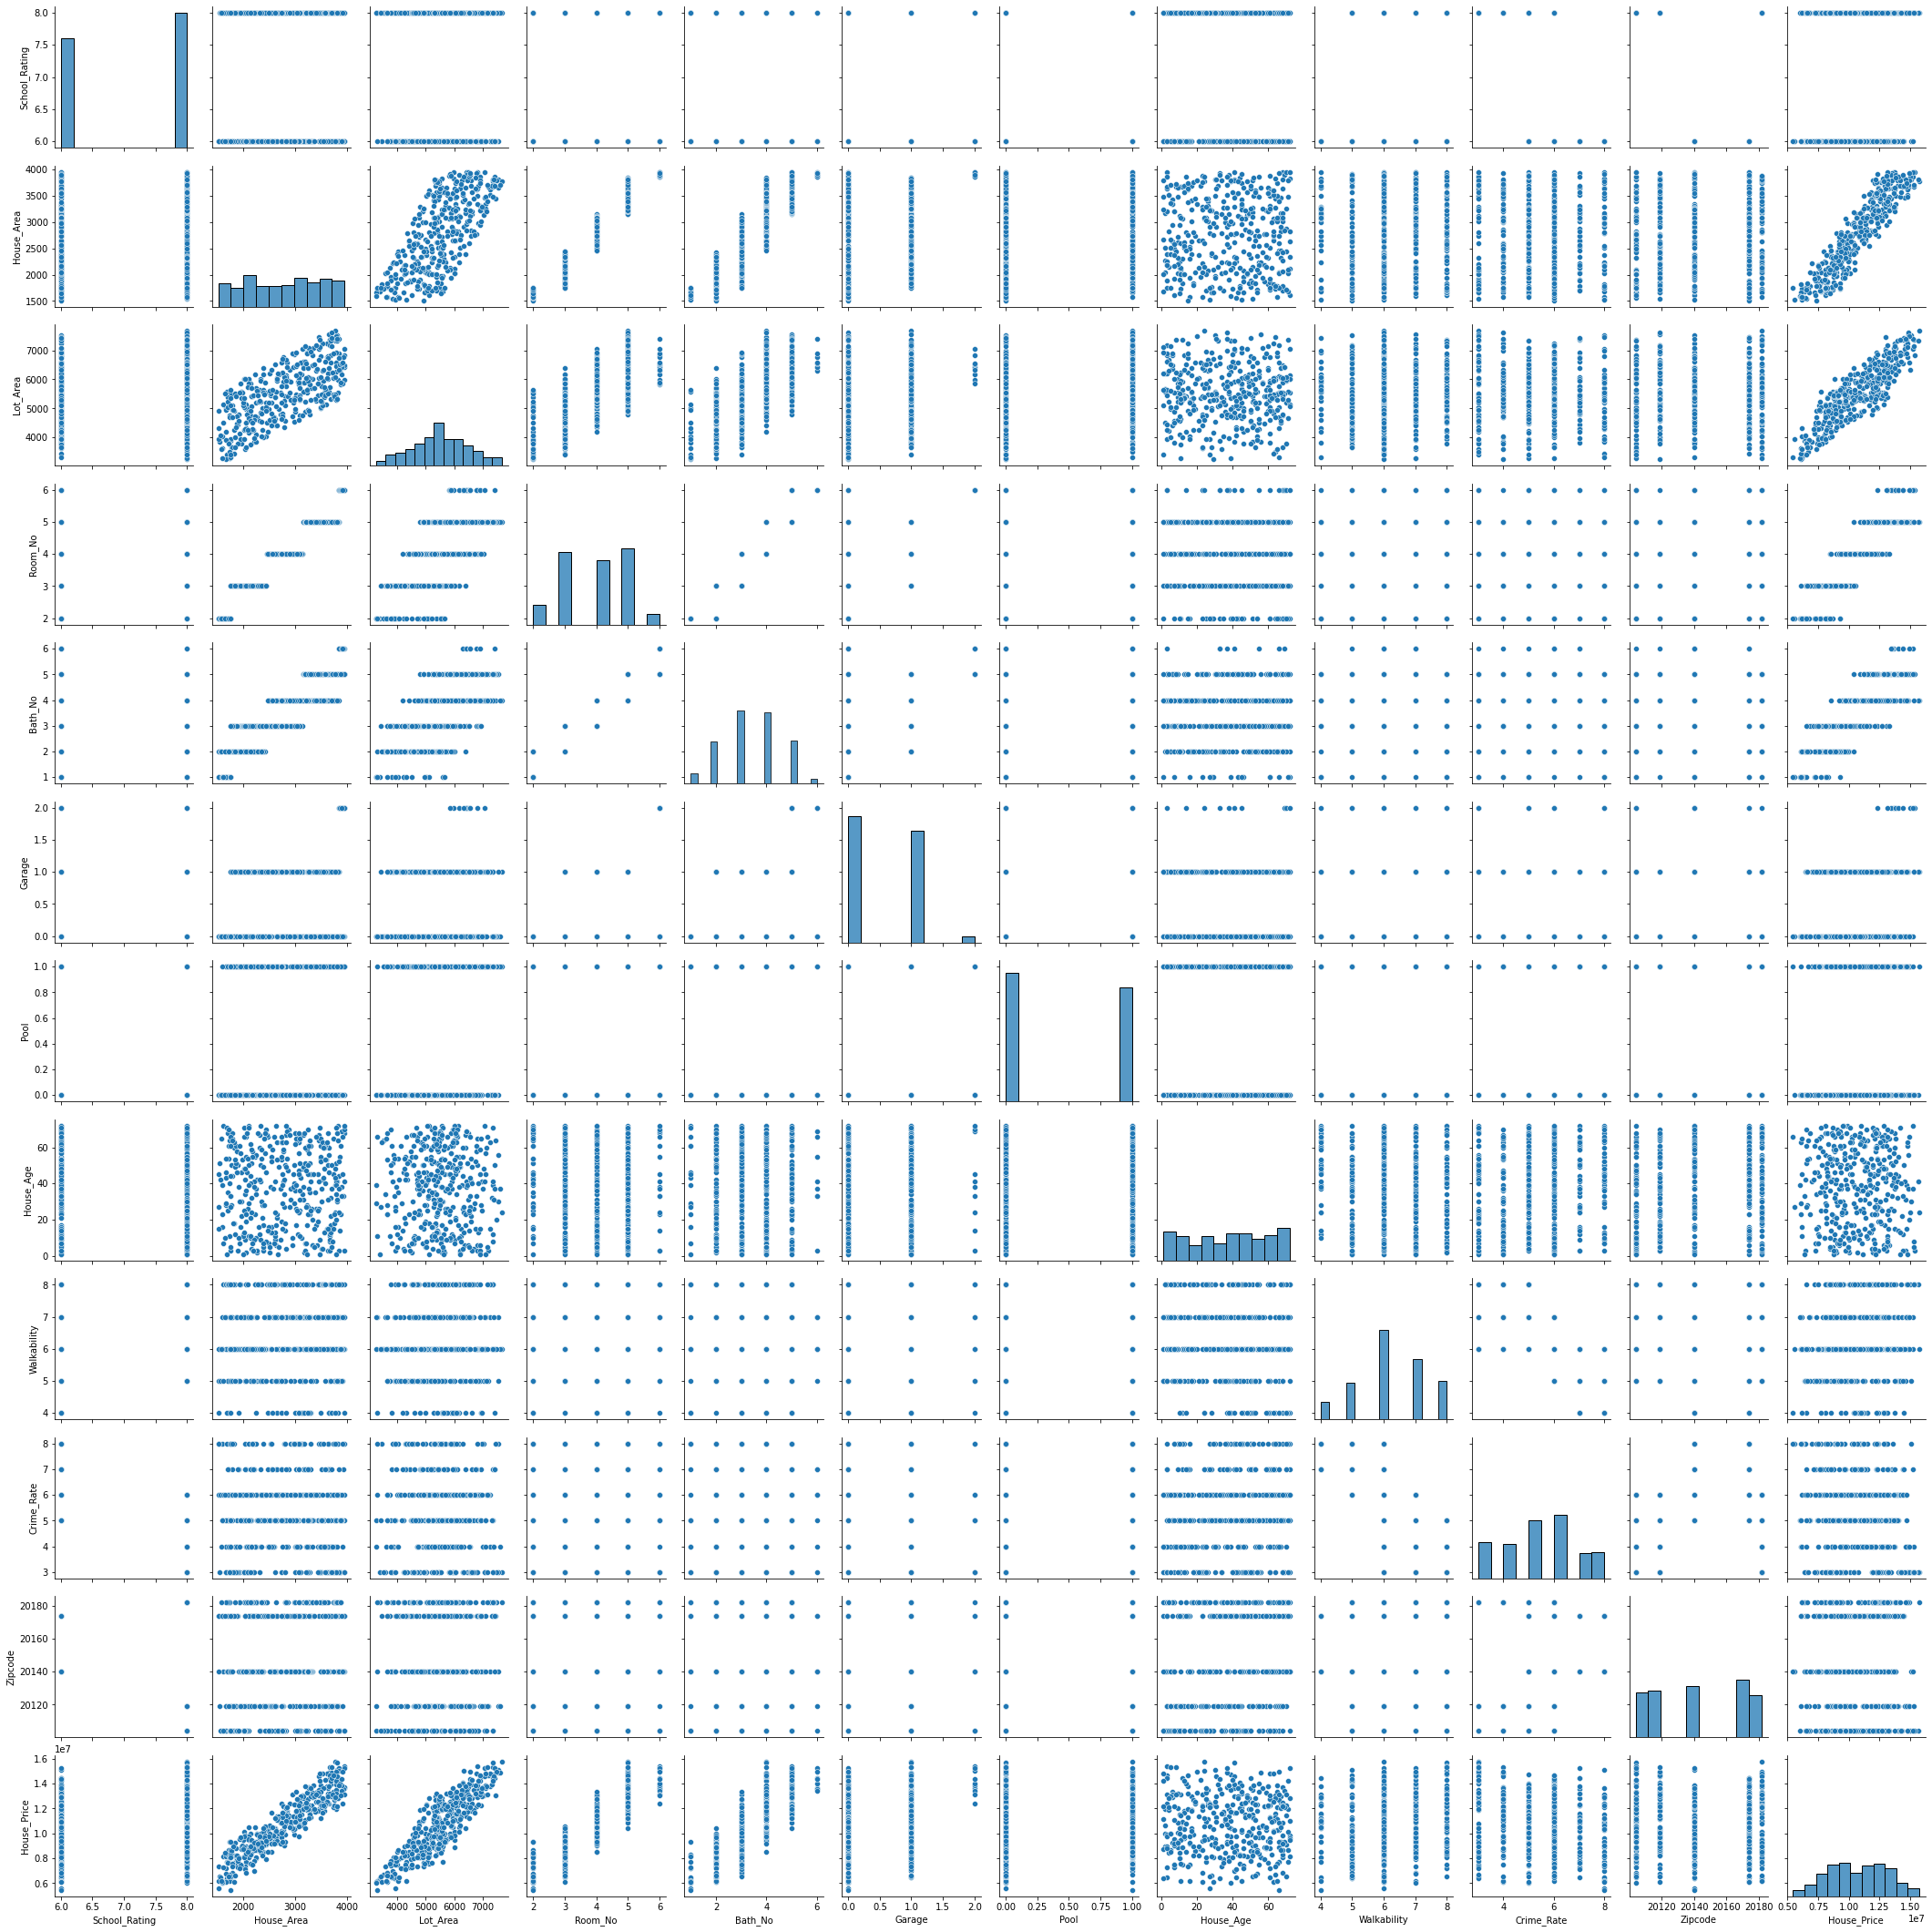

In [7]:
sns.pairplot(t_and_v)

In [8]:
## 1.1 Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate?

avg_cr = t_and_v.groupby(['Zipcode'])[['Crime_Rate']].mean()
avg_cr.sort_values(by='Crime_Rate',ascending=False)

,Crime_Rate
Zipcode,
20140,6.511905
20174,6.368421
20119,4.610390
20182,4.500000
20104,4.283784


**The zipcode with highest average Crime_Rate is 20140.**

In [9]:
## 1.2 Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern?

avg_hp = t_and_v.groupby(['Zipcode'])[['House_Price']].mean().round(2)
avg_hp.sort_values(by='House_Price',ascending=True)

,House_Price
Zipcode,
20140,10306178.57
20174,10637042.11
20104,10832540.54
20119,10872129.87
20182,10901485.71


**The zipcode with lowest average House_Price is 20140.**

The pattern I notice here is the relation between House_Price and Crime_Rate. House_price and Crime_Rate are inversely proportional. Which means, higher Crime_Rate will decrease the House_Price and vice-versa.

In [10]:
## 1.3 What feature has the strongest correlation with the "School_Rating"

corr = t_and_v.corrwith(t_and_v["School_Rating"]).drop("School_Rating").sort_values(ascending=False)
corr

Walkability    0.373675
House_Price    0.081382
Garage         0.016915
Bath_No        0.011234
Room_No        0.005996
House_Area     0.003273
Pool           0.001310
Lot_Area      -0.012608
House_Age     -0.114875
Zipcode       -0.402891
Crime_Rate    -0.651958
dtype: float64

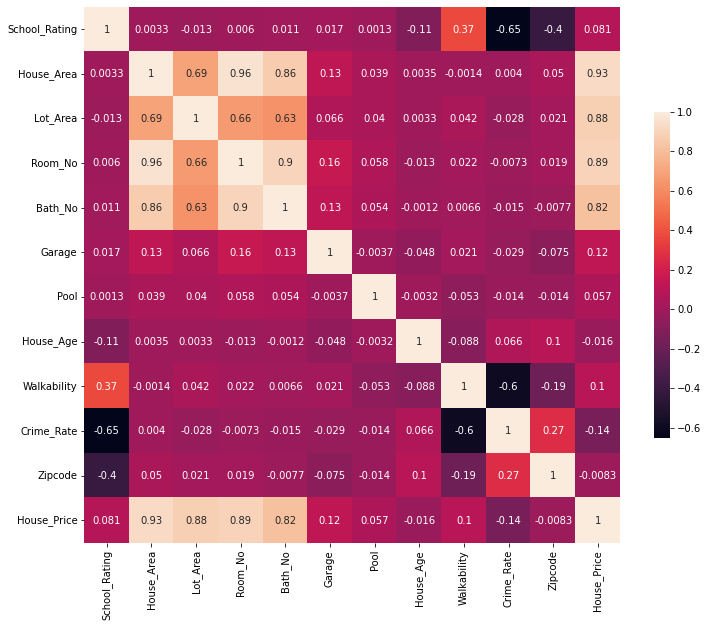

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(t_and_v.corr(), square=True, cbar_kws={"shrink": .5},annot=True)
plt.show()

1.   **We can see here that "Walkability" has the strongest positive correlation with the "School_Rating"**.  Which means, higher walkability rate the will make school rate higher.
2.   **"Crime_Rate" has the strongest negative correlation with "School_Rating"**. Which means, higher crime rate will make scholl rate lower. 




In [12]:
## 1.4 Split your dataset into two (training 80%, validation (testing) %20, random_state=1). 
## Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error using 
## 100∗max|(𝑦𝑖−𝑦̂ 𝑖)/𝑦𝑖|  and  𝑅2 , where  𝑦𝑖  is the true value for the  𝑖𝑡ℎ  case in your testing data set and  𝑦̂ 𝑖  is the prediction.



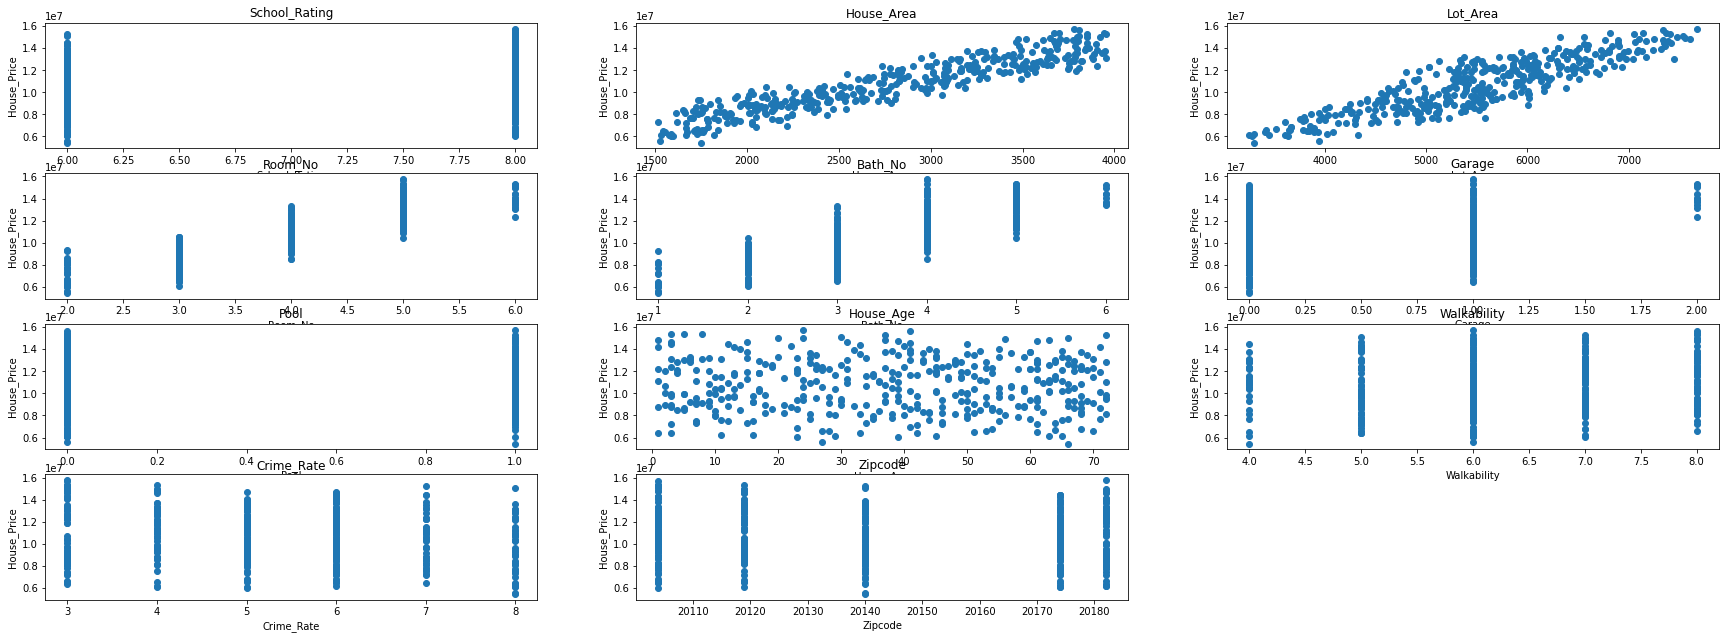

In [13]:
plt.figure(figsize=(30, 30))

features = ['School_Rating', 'House_Area', 'Lot_Area', 'Room_No', 'Bath_No','Garage', 'Pool', 'House_Age', 'Walkability', 'Crime_Rate', 'Zipcode' ]
target = t_and_v['House_Price']

for i, col in enumerate(features):
    plt.subplot( len(features),3, i+1)
    x = t_and_v[col]
    y = target
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('House_Price')

In [14]:
X = t_and_v.iloc[:,:-1].values
Y = t_and_v.iloc[:,-1].values.reshape(-1,1)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print("\n")


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
r2 = r2_score(Y_train, y_train_predict)
mre = 100 * (np.max(np.abs((Y_train - y_train_predict)/Y_train)))


print("The model performance for training set")
print("--------------------------------------")
print('R2 score is :',r2)
print('Maximum Relative Error is :', mre )
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
r2 = r2_score(Y_test, y_test_predict)
mre = 100 * (np.max(np.abs((Y_test - y_test_predict)/Y_test)))

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is : ', r2)
print('Maximum Relative Error is :', mre )

(320, 11)
(80, 11)
(320, 1)
(80, 1)


The model performance for training set
--------------------------------------
R2 score is : 0.9846839530376676
Maximum Relative Error is : 5.339346755061708


The model performance for testing set
--------------------------------------
R2 score is :  0.9774507111556614
Maximum Relative Error is : 5.382593910828749


In [16]:
lm = smf.ols(formula='House_Price ~ School_Rating + House_Area + Lot_Area + Room_No + Bath_No + Garage + Pool +House_Age + Walkability + Crime_Rate + Zipcode ', data=t_and_v).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_Price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2147.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        18:45:30   Log-Likelihood:                -5612.4
No. Observations:                 400   AIC:                         1.125e+04
Df Residuals:                     388   BIC:                         1.130e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.301e+07   1.15e+07      2.003      0.046    4.19e+05    4.56e+07
School_Rating -2.218e+04   2.14e+04     -1.035      0.301   -6.43e+04       2e+04
House_Area     2019.7541     78.193     25.830      0.000    1866.018    2173.490
Lot_Area       1074.0598     21.980     48.865      0.000    1030.845    1117.275
Room_No        7.743e+04   5.81e+04      1.332      0.184   -3.68e+04    1.92e+05
Bath_No       -3.566e+04   3.08e+04     -1.157      0.248   -9.63e+04    2.49e+04
Garage           4.4e+04   2.85e+04      1.546      0.123   -1.19e+04       1e+05
Pool           6.433e+04   3.08e+04      2.091      0.037    3856.525    1.25e+05
House_Age     -1048.1089    720.450     -1.455      0.147   -2464.584     368.367
Walkability    7084.7741   1.71e+04      0.413      0.680   -2.66e+04    4.08e+04
Crime_Rate    -2.073e+05   1.55e+04    -13.334      0.000   -2.38e+05   -1.77e+05
Zipcode       -1131.8588    567.648     -1.994      0.047   -2247.911     -15.807
==============================================================================
Omnibus:                       25.959   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.921
Skew:                          -0.052   Prob(JB):                      0.00701
Kurtosis:                       2.236   Cond. No.                     1.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
## Predicting and printing the House_Price values into the t_and_v dataset
t_and_v['Predicted_Price'] = lin_model.predict(X).round(2)
t_and_v

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price,Predicted_Price
0,8,3672,7364,5.0,5.0,1.0,0.0,8,8.0,4,20104,15332000.0,14876399.98
1,6,1743,3893,2.0,2.0,0.0,0.0,33,5.0,8,20140,6411000.0,6247498.46
2,8,2242,5199,3.0,3.0,1.0,0.0,34,7.0,6,20182,8931000.0,9040280.28
3,8,2257,4699,3.0,3.0,0.0,1.0,42,6.0,5,20182,8662000.0,8759535.75
4,8,2436,5200,3.0,3.0,1.0,0.0,70,7.0,6,20182,9098000.0,9397908.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,8,1843,3654,3.0,2.0,1.0,0.0,53,5.0,6,20182,6627000.0,6556875.20
396,8,3031,6512,4.0,3.0,1.0,1.0,25,8.0,4,20104,12737000.0,12654648.06
397,6,2466,4202,4.0,4.0,1.0,1.0,14,4.0,7,20174,8524000.0,8359624.72
398,6,2559,5621,4.0,4.0,1.0,1.0,59,4.0,7,20174,10489000.0,10021058.43


In [18]:
## 1.5 Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv), 
## guess the prices of these 10 houses featured in this dataset and print your predictions. 
## Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

test_df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv')
test_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode
0,8,2030,4715,3.0,2.0,1.0,1.0,48,7.0,4,20166
1,8,1739,5499,2.0,2.0,0.0,1.0,37,8.0,3,20166
2,7,3628,5689,5.0,5.0,1.0,0.0,59,6.0,4,20170
3,4,2019,5441,3.0,2.0,0.0,0.0,2,4.0,8,20124
4,9,2311,6227,3.0,3.0,1.0,0.0,17,8.0,5,20165
5,8,3662,6049,5.0,4.0,1.0,0.0,41,5.0,6,20166
6,4,2545,5728,4.0,3.0,1.0,1.0,43,5.0,8,20124
7,9,3050,5876,4.0,4.0,0.0,1.0,2,6.0,5,20165
8,7,3079,6930,4.0,4.0,0.0,1.0,9,6.0,4,20189
9,7,1718,3883,2.0,1.0,0.0,0.0,10,8.0,5,20189


In [19]:
test_df['Predicted_Price'] = lin_model.predict(test_df).round(2)
test_df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,Predicted_Price
0,8,2030,4715,3.0,2.0,1.0,1.0,48,7.0,4,20166,8561819.45
1,8,1739,5499,2.0,2.0,0.0,1.0,37,8.0,3,20166,8980294.33
2,7,3628,5689,5.0,5.0,1.0,0.0,59,6.0,4,20170,12881526.37
3,4,2019,5441,3.0,2.0,0.0,0.0,2,4.0,8,20124,8599287.43
4,9,2311,6227,3.0,3.0,1.0,0.0,17,8.0,5,20165,10511332.02
5,8,3662,6049,5.0,4.0,1.0,0.0,41,5.0,6,20166,12921742.60
6,4,2545,5728,4.0,3.0,1.0,1.0,43,5.0,8,20124,10019012.08
7,9,3050,5876,4.0,4.0,0.0,1.0,2,6.0,5,20165,11708426.89
8,7,3079,6930,4.0,4.0,0.0,1.0,9,6.0,4,20189,13117137.55
9,7,1718,3883,2.0,1.0,0.0,0.0,10,8.0,5,20189,6771455.76


## Q2. (10 points)

The Default data set of the ISLR2 package contains data about ten thousand customers. We know the balance of their bank account, their annual income and whether they are a student. You can download the dataset here: https://github.com/simsekergun/DATA601/blob/main/Datasets/Default.xlsx?raw=true'

Let's replace yes' and no's with 1's and 0's using the factorize() function. Note that factorize() returns two objects: a label array and an array with the unique values. We are only interested in the first object, i.e. <br>
<code>df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/Datasets/Default.xlsx?raw=true',index_col=[0]) </code> <br>
<code>df['default'] = df.default.factorize()[0]</code>  <br>
<code>df['student'] = df.student.factorize()[0]</code> <br>


Here the steps/questions you need to follow <br>
<b>2.1</b> Plot the histograms of the features in this dataset. What kinds of distributions do you see? <br>
<b>2.2</b> Boxplot 'default vs balance' and 'default vs income'. Which one has outliers? <br> 
<b>2.3</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a simple logistic regression model to predict default from balance feature only. Create the confusion matric and calculate accuracy, sensitivity, and specificity. <br> 
<b>2.4</b> Repeat 2.3 but this time use 'balance', 'income', and 'student' features to predict the default with a multiple logistic regression model. Create the confusion matric and calculate accuracy, sensitivity, and specificity.  <br>
<b>2.5</b> What does having a high sensitivity and a low specificity mean?<br>

In [20]:
df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/Datasets/Default.xlsx?raw=true',index_col=[0])
df['default'] = df.default.factorize()[0]
df['student'] = df.student.factorize()[0]
df

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879
...,...,...,...,...
9996,0,0,711.555020,52992.378914
9997,0,0,757.962918,19660.721768
9998,0,0,845.411989,58636.156984
9999,0,0,1569.009053,36669.112365


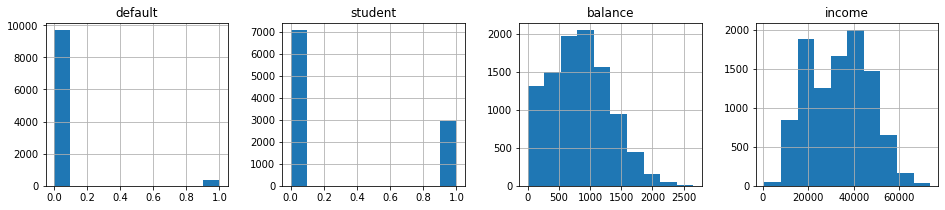

In [21]:
## 2.1 Plot the histograms of the features in this dataset. What kinds of distributions do you see?
df.hist(layout=(1,4),figsize=(16,3))
plt.show()







*  default -- Positively Skewed Distribution
*  student -- Positively Skewed Distribution
*  balance -- Positively Skewed Unimodal Distribution
*  income -- Symmetrical Distribution







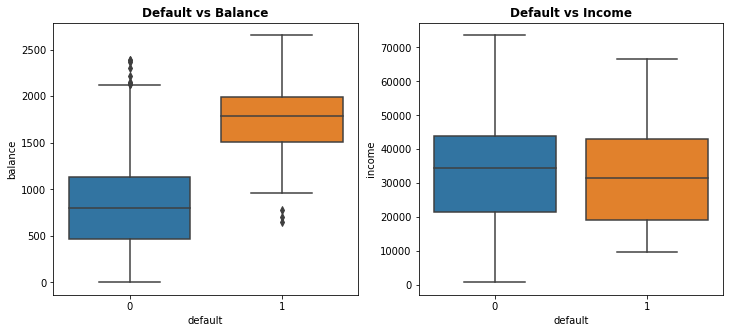

In [22]:
## 2.2 Boxplot 'default vs balance' and 'default vs income'. Which one has outliers?

plt.figure(figsize =(12, 5))
plt.subplot(121)
sns.boxplot(x="default", y='balance', data = df)
plt.title("Default vs Balance", fontweight='bold')

plt.subplot(122)
sns.boxplot(x="default", y='income', data = df)
plt.title("Default vs Income", fontweight='bold')

plt.show()

**"Default vs Balance" has outliers**

In [23]:
## 2.3 Split your dataset into two (training 80%, validation (testing) %20, random_state=1). 
## Build a simple logistic regression model to predict default from balance feature only.
## Create the confusion matric and calculate accuracy, sensitivity, and specificity.

x2 = df.balance.values.reshape(-1,1)
y2 = df.default.values.reshape(-1,1)

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1)


logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)
logreg.score(X2_test , y2_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9745

In [24]:
y2_predict = logreg.predict(X2_test)

In [25]:
cm1 = confusion_matrix(y2_test,y2_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[1930   11]
 [  40   19]]


In [26]:
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9745
Sensitivity :  0.994332818134982
Specificity :  0.3220338983050847


In [27]:
lm2 = smf.ols(formula='default ~ balance ', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 12 May 2022   Prob (F-statistic):          2.77e-286
Time:                        18:45:35   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0752      0.003    -22.416      0.000      -0.082      -0.069
balance        0.0001   3.47e-06     37.374      0.000       0.000       0.000
==============================================================================
Omnibus:                     8547.967   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180810.806
Skew:                           4.243   Prob(JB):                         0.00
Kurtosis:                      22.025   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
## 2.4 Repeat 2.3 but this time use 'balance', 'income', and 'student' features to predict the default with a multiple logistic regression model.
## Create the confusion matric and calculate accuracy, sensitivity, and specificity.

x3 = df.loc[:,['balance','income','student']].values
y3 = df.loc[:,'default'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=1)

logreg1 = LogisticRegression()
logreg1.fit(X3_train, y3_train)
logreg1.score(X3_test, y3_test)

0.967

In [29]:
y3_predict = logreg1.predict(X3_test)
cm2 = confusion_matrix(y3_test,y3_predict)
print('Confusion Matrix : \n', cm2)

Confusion Matrix : 
 [[1924   17]
 [  49   10]]


In [30]:
total2=sum(sum(cm2))

accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Accuracy :  0.967
Sensitivity :  0.9912416280267903
Specificity :  0.1694915254237288


In [31]:
lm3 = smf.ols(formula='default ~ balance + income + student ', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     471.7
Date:                Thu, 12 May 2022   Prob (F-statistic):          1.09e-286
Time:                        18:45:35   Log-Likelihood:                 3653.0
No. Observations:               10000   AIC:                            -7298.
Df Residuals:                    9996   BIC:                            -7269.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0812      0.008     -9.685      0.000      -0.098      -0.065
balance        0.0001   3.55e-06     37.412      0.000       0.000       0.000
income      1.992e-07   1.92e-07      1.039      0.299   -1.77e-07    5.75e-07
student       -0.0103      0.006     -1.824      0.068      -0.021       0.001
==============================================================================
Omnibus:                     8530.277   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179496.439
Skew:                           4.231   Prob(JB):                         0.00
Kurtosis:                      21.952   Cond. No.                     2.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
## 2.5 What does having a high sensitivity and a low specificity mean?

**Sensitivity** is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall.**** The higher the true positive rate, the better the model is in identifying the positive cases in the correct manner.**** 

**Specificity** measures the proportion of true negatives that are correctly identified by the model. This implies that there will be another proportion of actual negative which got predicted as positive and could be termed as false positives. This proportion could also be called a True Negative Rate (TNR). The sum of specificity (true negative rate) and false positive rate would always be 1.**** A low specificity means that the model is mislabeling a lot of negative results as positive.****